In [16]:
import numpy as np
import matplotlib.pyplot as plt
import gsd
import freud
import hoomd
import hoomd.md
import gsd.pygsd
import gsd.hoomd
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [17]:
def rdf_from_gsd(gsd_file, r_max=None, r_min=0.1, nbins=50, start=0):
    f = gsd.pygsd.GSDFile(open(gsd_file, "rb"))
    trajectory = gsd.hoomd.HOOMDTrajectory(f)
    
    if r_max is None:
        r_max = max(trajectory[-1].configuration.box[:3]) * 0.45
    freud_rdf = freud.density.RDF(bins=nbins, r_max=r_max, r_min=r_min)
    for frame in trajectory[start:]:
        freud_rdf.compute(system=frame, reset=False)
    return freud_rdf

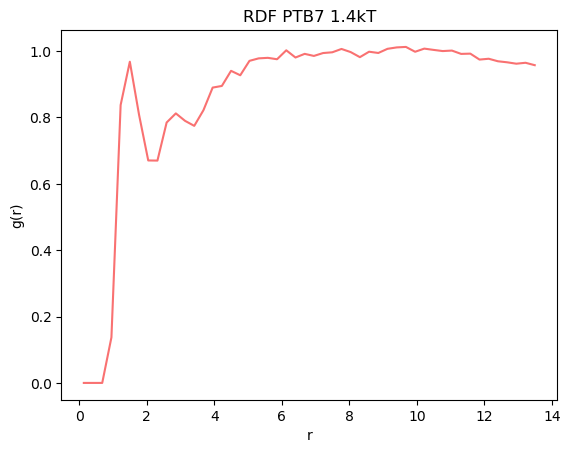

In [22]:
gsdfile = 'data/ptb7/trajectories/5mer-1.4kT-1.0den-centers.gsd'
rdf = rdf_from_gsd(gsdfile, start = 1, r_max = None, r_min = 0)
plt.plot(rdf.bin_centers, rdf.rdf,'#f97171')
plt.title("RDF PTB7 1.4kT")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.style.use('default')
plt.show()

In [4]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
